# Low-Rank and Linear Spectral Matrix Completion for Playlist Recommendation

In [181]:
# -*- coding: utf8 -*-
import sys
import os
import time
import operator
import numpy as np
import scipy as sp
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.sparse
import itertools
import random
import IPython.utils.path
from sklearn.cross_validation import train_test_split


%matplotlib inline
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['grid.color'] = '#66CCCC'
mpl.rcParams['text.color'] = '#0EBFE9'
mpl.rcParams['xtick.color'] = '#66CCCC'
mpl.rcParams['ytick.color'] = '#66CCCC'
mpl.rcParams['axes.labelcolor'] = '#0EBFE9'

import recog as rec
from recog.notebook import *

%load_ext autoreload
%autoreload 2

# reload(sys)  # Reload does the trick!
# sys.setdefaultencoding('UTF8')

# pd.options.display.encoding = 'utf-8'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



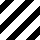
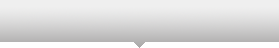
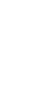
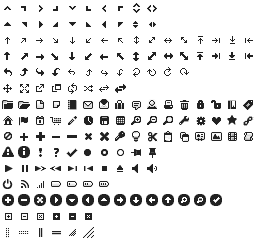
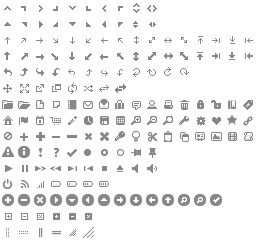
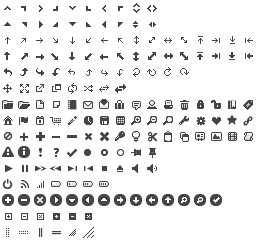
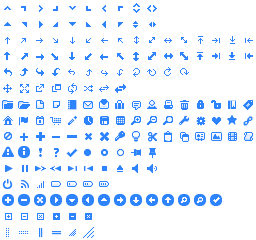
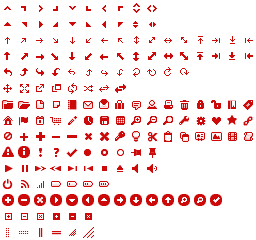
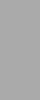
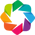
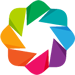
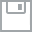
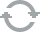
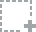
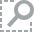
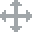
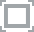
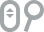

In [2]:
import bokeh.plotting as bp
from bokeh.palettes import brewer
bp.output_notebook()

## Test on synthetic data

In [2]:
DATA_DIR = os.path.join(IPython.utils.path.get_home_dir(), 'work/recog/resources/')
print 'Data directory:', DATA_DIR
dataset_name = 'recom'

In [3]:
data = sp.io.loadmat(os.path.join(DATA_DIR, 'recom_data.mat'))

In [4]:
data['C'].shape

(256, 128)

In [5]:
# m = (data['C'] > 0.06) * 1.0
rec.plot_factor_mat(m)

NameError: name 'm' is not defined

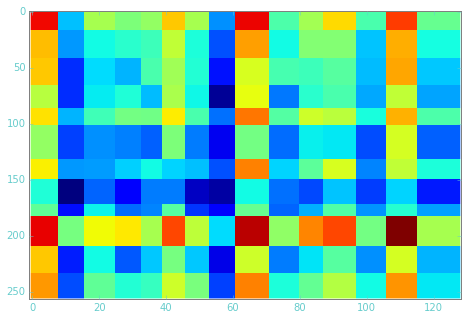

In [6]:
rec.plot_factor_mat(data['C'])

### Description

- A_gt = A ground truth
- B_gt = B ground truth
- C = ground truth
- A init = Initialisation A because the problem is non convex
- B init = Initialisation B
- KA, KB = graph gradient operators for A, B
- O = Omega = observation mask
- WB = graph of B (songs)
- perc: percentage of observation
- norm A: norm of operator A


In [6]:
A, B = rec.proximal_training(data['C'], data['WA'], data['WB'], 
                             data['Agt'].shape[1], data['O'], nb_iter_max=100, verbose=True)
# A, B = rec.proximal_training(m, data['WA'], data['WB'], 
#                              data['Agt'].shape[1], data['O'], nb_iter_max=100, verbose=False)

### Plot results

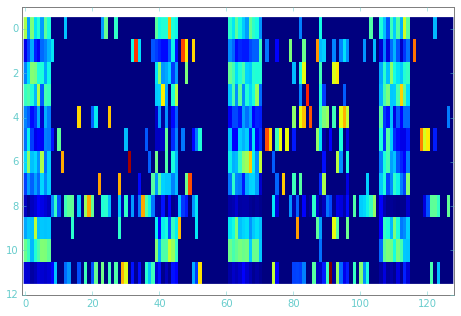

In [508]:
rec.plot_factor_mat(B)

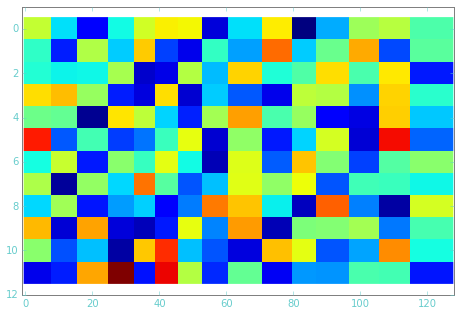

In [509]:
rec.plot_factor_mat(data['Bgt'])

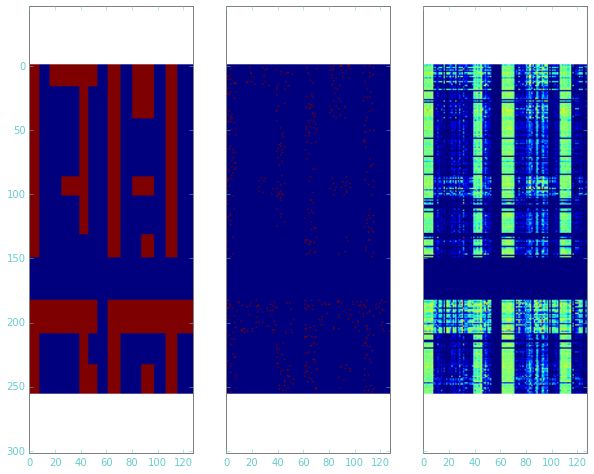

In [513]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches((10, 8))
# ax1.imshow(data['C'])
ax1.imshow(m)
# ax2.imshow(data['C'] * data['O'])
ax2.imshow(m * data['O'])
ax3.imshow(A.dot(B))

### Recommender part

In [274]:
results = sp.io.loadmat(os.path.join(DATA_DIR, 'result_AB.mat'))

In [278]:
def keypoint_test(C, obs=0.05, row=15):
    # TODO
#     if not given rand
    c_test = C[row, :]
    to_pick = int(len(c_test) * obs)
    mask = np.random.choice(range(len(c_test)), to_pick)    
    return zip(mask, c_test[mask])
                                     
    
row = 15
c_test = keypoint_test(data['C'], row=row)
_, c_reco = rec.recommend(results['B'], c_test, 0)

np.linalg.norm(data['C'][row, :] - c_reco)

0.014363040365975268

In [279]:
results['B']

array([[ 0.09001966,  0.09001964,  0.09001966, ...,  0.08731969,
         0.08712971,  0.08712971],
       [ 0.07630951,  0.07630951,  0.07630951, ...,  0.07589075,
         0.07589075,  0.07589075],
       [ 0.08990648,  0.08990646,  0.08990647, ...,  0.08731734,
         0.08712668,  0.08712668],
       ..., 
       [ 0.08892649,  0.08892649,  0.08892653, ...,  0.08892642,
         0.08892642,  0.08892642],
       [ 0.08624339,  0.0862434 ,  0.0862434 , ...,  0.0862434 ,
         0.08624339,  0.0862434 ],
       [ 0.0900008 ,  0.09000078,  0.0900008 , ...,  0.08735646,
         0.08735646,  0.08735646]])

In [280]:
print results['A'].shape
print results['B'].shape

(256, 12)
(12, 128)


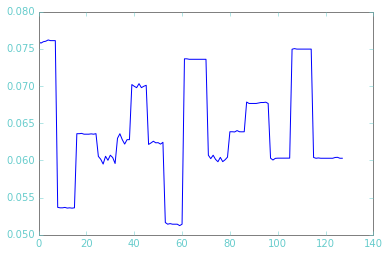

In [281]:
plt.plot(c_reco)

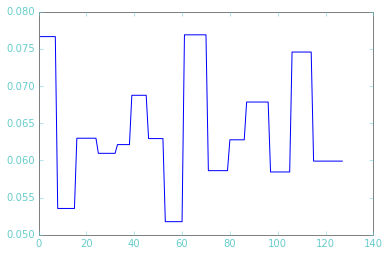

In [282]:
plt.plot(data['C'][row, :])

In [298]:
np.sum(np.square(data['C']), axis=0)

array([ 1.17533138,  1.17533138,  1.17533138,  1.17533138,  1.17533138,
        1.17533138,  1.17533138,  1.17533138,  0.64781604,  0.64781604,
        0.64781604,  0.64781604,  0.64781604,  0.64781604,  0.64781604,
        0.64781604,  0.82207265,  0.82207265,  0.82207265,  0.82207265,
        0.82207265,  0.82207265,  0.82207265,  0.82207265,  0.82207265,
        0.79047959,  0.79047959,  0.79047959,  0.79047959,  0.79047959,
        0.79047959,  0.79047959,  0.79047959,  0.81252759,  0.81252759,
        0.81252759,  0.81252759,  0.81252759,  0.81252759,  1.01727954,
        1.01727954,  1.01727954,  1.01727954,  1.01727954,  1.01727954,
        1.01727954,  0.7986459 ,  0.7986459 ,  0.7986459 ,  0.7986459 ,
        0.7986459 ,  0.7986459 ,  0.7986459 ,  0.58177936,  0.58177936,
        0.58177936,  0.58177936,  0.58177936,  0.58177936,  0.58177936,
        0.58177936,  1.18577494,  1.18577494,  1.18577494,  1.18577494,
        1.18577494,  1.18577494,  1.18577494,  1.18577494,  1.18

# Test on real data

In [3]:
def plot_mat(x, title, fig=(512, 200), cmap='Greys', reverse=False, nb_colors=9):
    f1 = bp.figure(plot_width=fig[0], plot_height=fig[1], 
                   x_range=[0, x.shape[1]], y_range=[0, x.shape[0]])
    

    pal = brewer[cmap][nb_colors]
    if reverse:
        pal = pal[::-1]
        
    f1.image(image=[x], x=[0], y=[0], 
             dw=[x.shape[1]], dh=[x.shape[0]], palette=pal)
    f1.title = title
    f1.title_text_color = 'red'
    f1.title_text_font_style = 'bold'
    bp.show(f1)

In [4]:
DATA_DIR = os.path.join(IPython.utils.path.get_home_dir(), 'data/aotmv2/')
# DATA_DIR = os.path.join( IPython.utils.path.get_home_dir(), 'local/aotm/')
print 'Data directory:', DATA_DIR

DATASET_NAME = 'aotm'
MAX_PROCESS = 8
song_id_key = 'aotm_id'
playlist_id_key = 'mix_id'

Data directory: /Users/kikohs/data/aotmv2/


In [5]:
SONGS = pd.read_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_songs.h5'), 'data')
SONGS.rename(columns={'temporal_echonest_features': 'ten'}, inplace=True)
PLAYLISTS = pd.read_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_playlists.h5'), 'data')
MIXES = pd.read_hdf(os.path.join(DATA_DIR, DATASET_NAME + '_mixes.h5'), 'data')

Opening /Users/kikohs/data/aotmv2/aotm_songs.h5 in read-only mode
Opening /Users/kikohs/data/aotmv2/aotm_playlists.h5 in read-only mode
Opening /Users/kikohs/data/aotmv2/aotm_mixes.h5 in read-only mode


In [6]:
# Extract features only from data
to_remove = set(['title', 'artist_name', 'genre', 'top_genres', 'terms', 
                 'release', 'key', 'mode', 'genre_topics', 'genre_topic', 'ncut_id'])
columns = set(SONGS.columns.tolist())
feat_col = list(columns - to_remove)

### Create smaller dataset from AOTM data

Here we remove ambiguous plyalist categories, we also verify that there are a sufficient number of playlists in each category. Each playlist is composed of "popular songs", (songs seen at least in a certain amount of playlists), and is not too short not too long.

In [157]:
min_playlists = 70
min_playlist_size = 8
max_playlist_size = 20
min_popularity = 6

to_remove = ['Mixed Genre', 'Theme', 'Single Artist', 'Alternating DJ', 'Mixed']

In [158]:
# Remove ambiguous categories
FILT_MIXES = MIXES[~MIXES.playlist_category.isin(to_remove)]
# Remove too short or too long playlists
FILT_MIXES = FILT_MIXES[FILT_MIXES['size'].between(min_playlist_size, max_playlist_size)]

# Filter popular songs
good_playlist_categories = np.unique(FILT_MIXES.playlist_category.values)
FILT_PLAYLISTS = PLAYLISTS[PLAYLISTS['playlist_category'].isin(good_playlist_categories)]
song_popularity_hist = FILT_PLAYLISTS.aotm_id.value_counts()
good_songs = song_popularity_hist[song_popularity_hist >= min_popularity].index.values
FILT_MIXES['aotm_id'] = FILT_MIXES['aotm_id'].apply(lambda x: list((set(x) & set(good_songs))))
FILT_MIXES['size'] = FILT_MIXES[song_id_key].apply(len)

# Refilter size of playlists
FILT_MIXES = FILT_MIXES[FILT_MIXES['size'].between(min_playlist_size, max_playlist_size)]
# Keep a sufficient number of playlist in each category
p_hist = FILT_MIXES['playlist_category'].value_counts()
P_CATEGORIES = p_hist.index[np.where(p_hist > min_playlists)].values
FILT_MIXES = FILT_MIXES[FILT_MIXES['playlist_category'].isin(P_CATEGORIES)]

# Update the list of valid songs since we removed some playlists
good_songs = np.unique(list(itertools.chain(*list(FILT_MIXES['aotm_id'].values))))
FILT_PLAYLISTS = FILT_PLAYLISTS[FILT_PLAYLISTS[playlist_id_key].isin(FILT_MIXES.index.values)]
FILT_PLAYLISTS = FILT_PLAYLISTS[FILT_PLAYLISTS['aotm_id'].isin(good_songs)]

# Keep only valid song and features in playlists
FILT_SONGS = SONGS[SONGS.index.isin(good_songs)].sort('genre')
FILT_FEAT = FILT_SONGS[feat_col]

print 'Number of playlists:', len(FILT_MIXES)
print 'Number of songs:', len(FILT_SONGS)

Number of playlists: 4690
Number of songs: 8175


In [159]:
FILT_MIXES['playlist_category'].value_counts()

Rock/Pop      1227
Indie Rock     957
Romantic       786
Road Trip      464
Depression     345
Break Up       319
Punk           233
Narrative      193
Sleep          166
dtype: int64

### Create very small tuning dataset

In [ ]:
sample_factor = 10

In [211]:
sample_idx = random.sample(FILT_MIXES.index, len(FILT_MIXES) // sample_factor)
MINI_MIXES = FILT_MIXES[FILT_MIXES.index.isin(sample_idx)]
# Update the list of valid songs since we removed some playlists
good_songs = np.unique(list(itertools.chain(*list(MINI_MIXES['aotm_id'].values))))
MINI_PLAYLISTS = FILT_PLAYLISTS[FILT_PLAYLISTS[playlist_id_key].isin(MINI_MIXES.index.values)]
MINI_PLAYLISTS = MINI_PLAYLISTS[MINI_PLAYLISTS['aotm_id'].isin(good_songs)]

# Keep only valid song and features in playlists
MINI_SONGS = FILT_SONGS[FILT_SONGS.index.isin(good_songs)].sort('genre')
MINI_FEAT = MINI_SONGS[feat_col]

print 'Number of playlists:', len(MINI_MIXES)
print 'Number of songs:', len(MINI_SONGS)

Number of playlists: 469
Number of songs: 3016


In [212]:
MINI_MIXES['playlist_category'].value_counts()

Rock/Pop      132
Indie Rock    100
Romantic       68
Road Trip      53
Break Up       30
Depression     27
Punk           26
Narrative      17
Sleep          16
dtype: int64

### Create song graph

In [213]:
SONG_GRAPH, MINI_SONGS = rec.create_song_graph(MINI_FEAT, MINI_SONGS, 10)
print nx.info(SONG_GRAPH)

Ncuts clusters: 19
Created in: 4.92794013023 seconds 

Name: Song graph
Type: Graph
Number of nodes: 3016
Number of edges: 24815
Average degree:  16.4556


#### Plot adjacency matrix

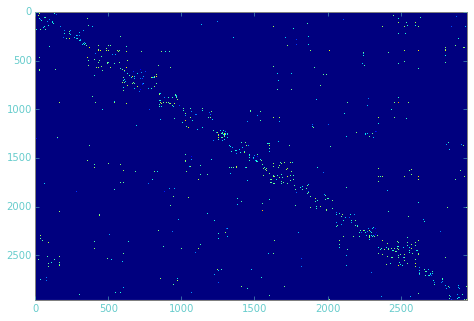

In [209]:
W_SONGS = nx.to_scipy_sparse_matrix(SONG_GRAPH)
rec.plot_factor_mat(W_SONGS.todense())
# plot_mat(W_SONGS.todense(), 'Song graph ncut', fig=(512, 512))

### Create playlist graph

In [216]:
PLAYLIST_GRAPH, MINI_MIXES = rec.create_playlist_graph(MINI_MIXES, MINI_PLAYLISTS, playlist_id_key, song_id_key, 
                                                       'playlist_category', 0.3, 0.1)
print nx.info(PLAYLIST_GRAPH)

Ncuts clusters: 9
Created in: 1.41439199448 seconds 

Name: Playlist graph
Type: Graph
Number of nodes: 469
Number of edges: 4544
Average degree:  19.3774


#### Plot adjacency matrix

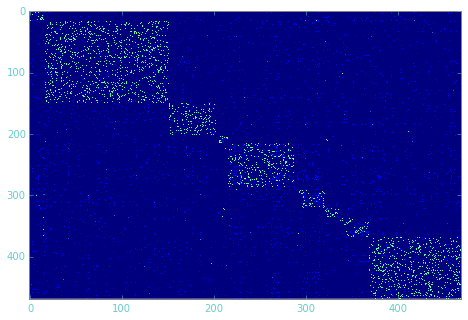

In [218]:
W_PLAYLISTS = nx.to_scipy_sparse_matrix(PLAYLIST_GRAPH)
rec.plot_factor_mat(W_PLAYLISTS.todense())

In [219]:
MINI_MIXES.groupby('ncut_id')['playlist_category'].value_counts()

ncut_id            
0        Sleep          11
         Break Up        6
1        Rock/Pop      132
         Narrative       2
2        Road Trip      52
         Depression      1
3        Punk           11
         Narrative       1
4        Romantic       68
         Narrative       4
         Sleep           3
         Road Trip       1
         Break Up        1
5        Depression     26
         Sleep           2
6        Punk           15
         Narrative       1
         Break Up        1
7        Break Up       22
         Narrative       9
8        Indie Rock    100
dtype: int64

### Create C matrix

In [220]:
C = rec.create_recommendation_matrix(MINI_MIXES, MINI_SONGS.index,
                                     playlist_id_key, DATASET_NAME, normalize=True)

### Plot C

In [236]:
# rec.plot_factor_mat(C.toarray())
plot_mat(C.toarray(), 'C', (512, 512))
print 'Sparsity ratio:', C.nnz / float(C.shape[0] * C.shape[1])

Sparsity ratio: 0.00319263855033


## Dump data

In [231]:
DUMP_DIR = os.path.join(DATA_DIR, 'dump/')

In [ ]:
nx.write_gpickle(SONG_GRAPH, os.path.join(DUMP_DIR, 'mini_song_graph.gpickle'))
nx.write_gpickle(PLAYLIST_GRAPH, os.path.join(DUMP_DIR, 'mini_playlist_graph.gpickle'))

MINI_MIXES.to_hdf(os.path.join(DUMP_DIR, 'mini_mixes.h5'), 'data')
MINI_SONGS.to_hdf(os.path.join(DUMP_DIR, 'mini_songs.h5'), 'data')

In [239]:
matlab_export_path = os.path.join(DUMP_DIR, 'recog_real_data_mini.mat')

matlab_data = dict()

matlab_data['C'] = C
matlab_data['W_a'] = W_PLAYLISTS
matlab_data['W_b'] = W_SONGS


sp.io.savemat(matlab_export_path, matlab_data)
print 'Exported file:', matlab_export_path

Exported file: /Users/kikohs/data/aotmv2/dump/recog_real_data_mini.mat


### Train model

In [224]:
Cdense = np.array(C.todense())

In [226]:
rank = len(to_keep)
theta_tv_playlist = 3e4 / C.shape[0]  # proportionnal to the number of playlists
theta_tv_songs = 0.8 / C.shape[1]  # proportional to the number of songs

print 'theta_tv_playlist:', theta_tv_playlist
print 'theta_tv_songs:', theta_tv_songs

A, B = rec.proximal_training(Cdense, PLAYLIST_GRAPH, SONG_GRAPH, rank, 
                             theta_tv_a=theta_tv_playlist, theta_tv_b=theta_tv_songs, 
                             nb_iter_max=6,
                             nb_min_iter=4, 
                             stop_criterion=1e-3,
                             min_iter_inner=200, verbose=True)

theta_tv_playlist: 63.9658848614
theta_tv_songs: 0.00026525198939
norm Y: 2.00388050132
norm Y: 1.0838222763
Step: 1 err: 21.6829249386
Delta A: 0.849778771116
Delta B: 1.36245841859

norm Y: 2.04682531885
norm Y: 1.01796665973
Step: 2 err: 21.6781638953
Delta A: 0.54531639908
Delta B: 0.827729230624

norm Y: 1.66140589327
norm Y: 1.0305332461
Step: 3 err: 21.6579851339
Delta A: 0.530137740168
Delta B: 0.951226296662

norm Y: 1.30244322143
norm Y: 1.04161371795
Step: 4 err: 21.6975246786
Delta A: 0.557264147478
Delta B: 0.921800436953

norm Y: 1.13684935893
norm Y: 1.06579859454
Step: 5 err: 21.6978908729
Delta A: 0.568754563339
Delta B: 0.647362355956

norm Y: 1.04817937331
norm Y: 1.07849092484
Step: 6 err: 21.6724994954
Delta A: 0.537358791217
Delta B: 0.341587795426

Max iterations reached, did not converged after 6 steps, reconstruction error: 21.6724994954
Total elapsed time: 192.257018089 seconds


### Plot results

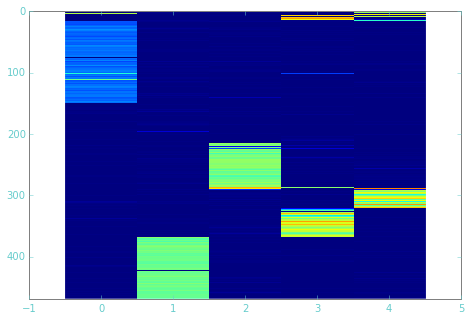

In [227]:
# plot_mat(A, 'A')
rec.plot_factor_mat(A)

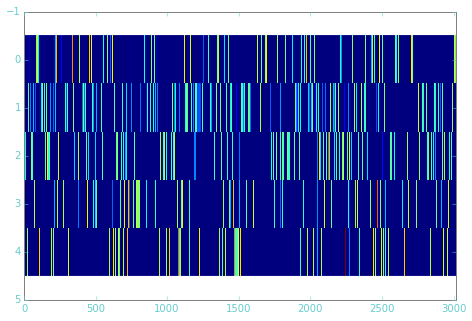

In [228]:
# plot_mat(B, 'B')
rec.plot_factor_mat(B)

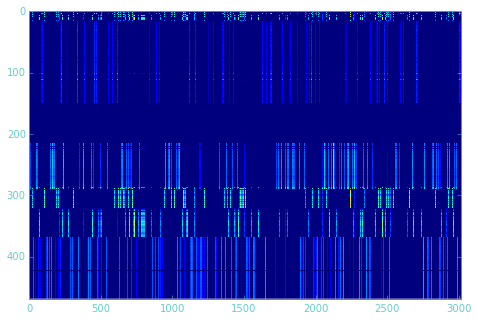

In [229]:
# plot_mat(A.dot(B), 'C = A.dot(B)', reverse=False)
rec.plot_factor_mat(A.dot(B))

### Recommender part

In [79]:
np.unique(FILT_MIXES['playlist_category']).tolist()

SONG_TO_IDX = dict(zip(FILT_SONGS.index.values, itertools.count()))

['Depression', 'Hip Hop', 'Reggae', 'Rock', 'Romantic']

In [80]:
sample_size = 8
k = 15

In [81]:
def test_all_categories(selected_categories, playlist_df, song_df, sample_size, 
                        B, k, idmap, song_id_key, threshold=1e-6, do_random=False):
    
    results = dict()
    for p_category in selected_categories:
        
        query_cat = p_category
        if do_random:
            query_cat = ''
            
        reco_df, input_df, raw = recommend(playlist_df, song_df, query_cat,
              sample_size, B, k, idmap, song_id_key, threshold)
        
        score = playlist_category_score(reco_df, playlist_df, p_category)
        results[p_category] = score
        
    return pd.DataFrame(results, index=[0])


def average_test_all_categories(nb_laps, selected_categories, playlist_df, song_df, sample_size, 
                        B, k, idmap, song_id_key, threshold=1e-6, do_random=False):
    out = []
    for _ in xrange(nb_laps):
        res = test_all_categories(selected_categories, playlist_df, song_df, sample_size, 
                        B, k, idmap, song_id_key, threshold, do_random)
        out.append(res)
    return pd.concat(out, ignore_index=True)


def gain_vs_random(nb_laps, selected_categories, playlist_df, song_df, sample_size, 
                        B, k, idmap, song_id_key, threshold=1e-6):
    
    results = average_test_all_categories(nb_laps, selected_categories, playlist_df, song_df, 
                    sample_size, B, k, idmap, song_id_key)
    m = results.mean()
    
    results_random = average_test_all_categories(nb_laps, selected_categories, playlist_df, song_df, 
                    sample_size, B, k, idmap, song_id_key, do_random=True)
    n = results_random.mean()
    
    res = pd.concat([m, n], axis=1)
    res.rename(columns={0: 'query', 1: 'random'}, inplace=True)
    
    res['absolute gain'] = (res['query'] - res['random']) * 100
    res['relative gain'] = ( (res['query'] / res['random']) - 1 ) * 100
    
    return res
    

In [82]:
results = gain_vs_random(30, to_keep, FILT_PLAYLISTS, FILT_SONGS, 
                    sample_size, B, k, SONG_TO_IDX, song_id_key)
results

query    random  absolute gain  relative gain
Depression  0.440672  0.255380      18.529164      72.555267
Hip Hop     0.954702  0.058774      89.592790    1524.369719
Reggae      0.000000  0.000000       0.000000            NaN
Rock        0.003014  0.002190       0.082470      37.665453
Romantic    0.874359  0.686357      18.800229      27.391331

In [83]:
results.mean().transpose()

query              0.454549
random             0.200540
absolute gain     25.400931
relative gain    415.495443
dtype: float64

In [82]:
# mask = raw > 1e-3
# points = raw[mask]
# position = np.arange(len(mask))[mask]
# FILT_SONGS.iloc[position]['genre'].value_counts()